In [10]:
import matplotlib.pyplot as plt
import pandas as pd

dOrigem = pd.read_excel('dOrigem.xlsx')
#fEsthoteldc = pd.read_excel('fEsthoteldc.xlsx')
dSegmento = pd.read_excel('dSegmento.xlsx')
dVeiculocomunica = pd.read_excel('dVeiculocomunica.xlsx')
dTipoDC = pd.read_excel('dTipoDC.xlsx')
dtipouh = pd.read_excel('dtipouh.xlsx')
dCliente = pd.read_excel('dCliente.xlsx')
fEsthotel = pd.read_excel('fEsthotel_py.xlsx')

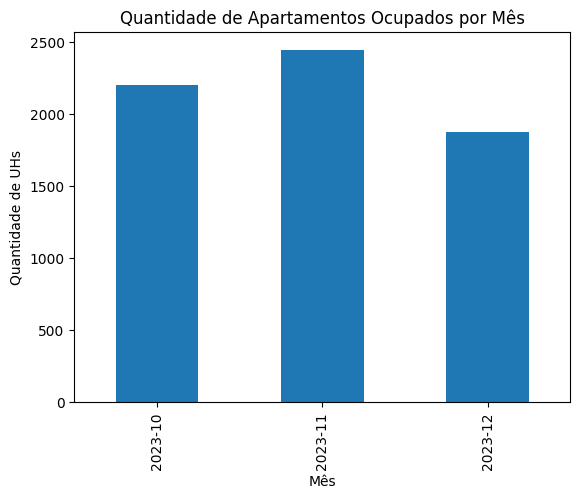

In [ ]:
fEsthotel['MESANO'] = pd.to_datetime(fEsthotel['DATAREFERENCIA']).dt.to_period('M')

fEsthotel.groupby('MESANO')['QTDEOCUPADO'].sum().plot(kind='bar')

plt.xlabel('Mês')
plt.ylabel('Quantidade de UHs')
plt.title('Quantidade de Apartamentos Ocupados por Mês')


plt.show()


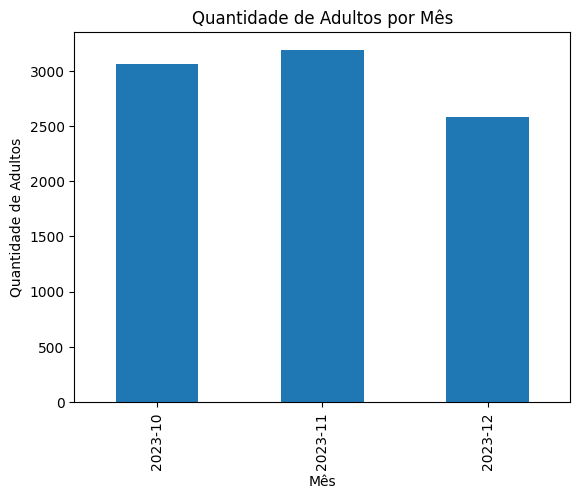

In [ ]:
fEsthotel['MESANO'] = pd.to_datetime(fEsthotel['DATAREFERENCIA']).dt.to_period('M')
fEsthotel.groupby('MESANO')['QTDEADULTOS'].sum().plot(kind='bar')

plt.xlabel('Mês')
plt.ylabel('Quantidade de Adultos')
plt.title('Quantidade de Adultos por Mês')

plt.show()

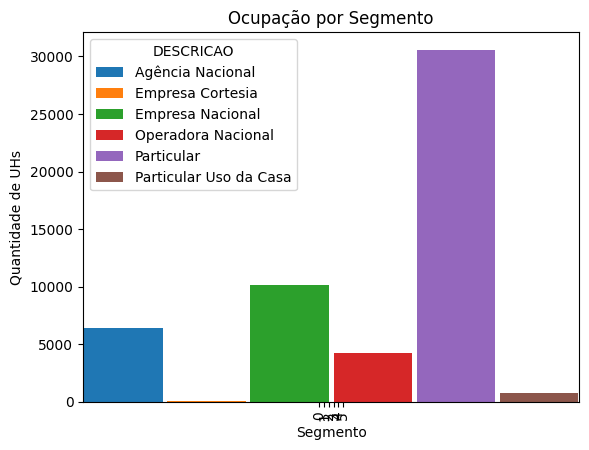

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd

merged_df = pd.merge(fEsthotel, dSegmento, on='CODSEGMENTO')

grouped_df = merged_df.groupby(['DESCRICAO'])['QTDEOCUPADO'].sum().reset_index()

grouped_df.pivot(columns='DESCRICAO', values='QTDEOCUPADO').plot(kind='bar', width = 100)

plt.xlabel('Segmento')
plt.ylabel('Quantidade de UHs')
plt.title('Ocupação por Segmento')

plt.show()


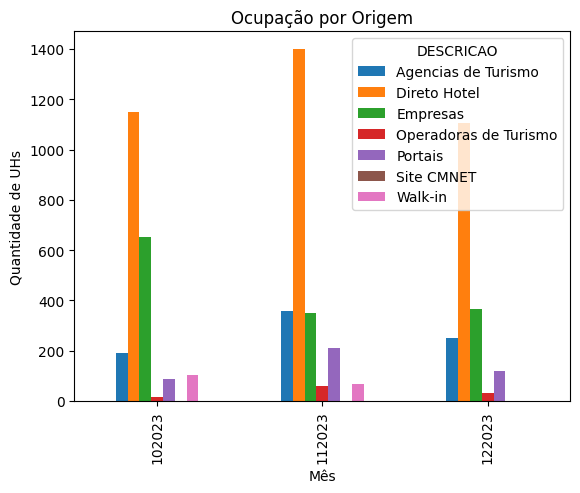

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

merged_df = pd.merge(fEsthotel, dOrigem, on='IDORIGEM')

grouped_df = merged_df.groupby(['MESANO', 'DESCRICAO'])['QTDEOCUPADO'].sum().reset_index()

grouped_df.pivot(index='MESANO', columns='DESCRICAO', values='QTDEOCUPADO').plot(kind='bar')

plt.xlabel('Mês')
plt.ylabel('Quantidade de UHs')
plt.title('Ocupação por Origem')

plt.show()

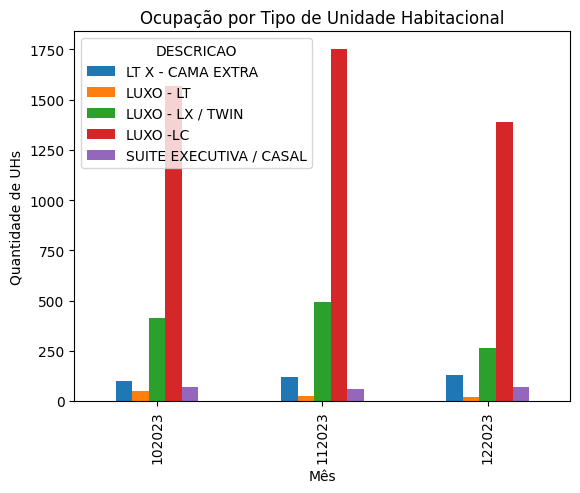

In [7]:
merged_df = pd.merge(fEsthotel, dtipouh, on='IDTIPOUH')

grouped_df = merged_df.groupby(['MESANO', 'DESCRICAO'])['QTDEOCUPADO'].sum().reset_index()

grouped_df.pivot(index='MESANO', columns='DESCRICAO', values='QTDEOCUPADO').plot(kind='bar')

plt.xlabel('Mês')
plt.ylabel('Quantidade de UHs')
plt.title('Ocupação por Tipo de Unidade Habitacional')

plt.show()


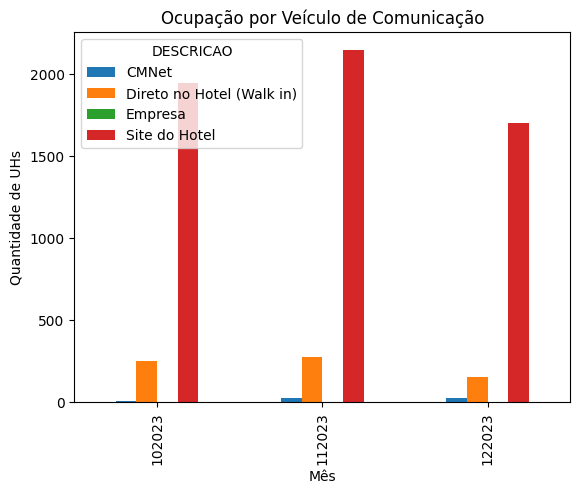

In [8]:
merged_df = pd.merge(fEsthotel, dVeiculocomunica, on='IDVEICULOS')

grouped_df = merged_df.groupby(['MESANO', 'DESCRICAO'])['QTDEOCUPADO'].sum().reset_index()

grouped_df.pivot(index='MESANO', columns='DESCRICAO', values='QTDEOCUPADO').plot(kind='bar')

plt.xlabel('Mês')
plt.ylabel('Quantidade de UHs')
plt.title('Ocupação por Veículo de Comunicação')

plt.show()

In [ ]:

import pandas as pd
merged_df = pd.merge(fEsthotel, dOrigem, on='IDORIGEM')

grouped_df = merged_df.groupby(['DESCRICAO'])['QTDEOCUPADO'].sum().reset_index()

sorted_df = grouped_df.sort_values(by='QTDEOCUPADO', ascending=False)

print("As 5 principais origens com a maior ocupação:")
print(sorted_df.head(5))

Top 5 Origins with the Highest Occupancy:
             DESCRICAO  QTDEOCUPADO
1         Direto Hotel         3654
2             Empresas         1367
0  Agencias de Turismo          798
4              Portais          417
6              Walk-in          169


In [ ]:
import pandas as pd

fEsthotel.rename(columns={'CLIENTERESERVANTE': 'IDFORCLI'}, inplace=True)

merged_df = pd.merge(fEsthotel, dCliente, on='IDFORCLI')

grouped_df = merged_df.groupby('NOME')['IDFORCLI'].count().reset_index()

sorted_df = grouped_df.sort_values(by='IDFORCLI', ascending=False)

print("Os 5 principais clientes com maior número de reservas:")
print(sorted_df.head(5))

grouped_df = merged_df.groupby('CODESTADO')['IDFORCLI'].count().reset_index()

sorted_df = grouped_df.sort_values(by='IDFORCLI', ascending=False)

print("\nTop 5 Clientes por Estado:")
print(sorted_df.head(5))

Os 5 principais clientes com maior número de reservas:
                                NOME  IDFORCLI
30                CLIENTE PARTICULAR      3402
19                       BOOKING.COM      1739
44   E-HTL RESERVAS ONLINE DE HOTEIS       403
49                           EXPEDIA       301
141                    TREND VIAGENS       246

Top 5 Clientes por Estado:
   CODESTADO  IDFORCLI
16        PA      2555
28        SP      1003
10        FL       790
12        MA       408
17        PB       346


In [ ]:
grouped_df = merged_df.groupby('NOME')['QTDECANCELAMENTOS'].sum().reset_index()

sorted_df = grouped_df.sort_values(by='QTDECANCELAMENTOS', ascending=False)

print("Os 5 principais clientes com mais cancelamentos:")
print(sorted_df.head(5))


Os 5 principais clientes com maior número de reservas:
                                    NOME  QTDECANCELAMENTOS
19                           BOOKING.COM                 58
30                    CLIENTE PARTICULAR                 21
140    TOUR HOUSE VIAGENS E TURISMO LTDA                  8
33   COPASTUR VIAGENS E TURISMO / MATRIZ                  7
49                               EXPEDIA                  6


In [9]:
import pandas as pd
merged_df = pd.merge(fEsthotel, dSegmento, on='CODSEGMENTO')

grouped_df = merged_df.groupby(['DESCRICAO'])['QTDEOCUPADO'].agg(['mean', 'max']).reset_index()

grouped_df.columns = ['Segmento', 'Média de Ocupação', 'Máximo de Ocupação']

print("Métrica de Ocupação por Segmento:")
print(grouped_df)

merged_df = pd.merge(fEsthotel, dOrigem, on='IDORIGEM')

grouped_df = merged_df.groupby(['DESCRICAO'])['QTDEOCUPADO'].agg(['mean', 'max']).reset_index()

grouped_df.columns = ['Origem', 'Média de Ocupação', 'Máximo de Ocupação']

print("\n\nMétrica de Ocupação por Origem:")
print(grouped_df)

merged_df = pd.merge(fEsthotel, dVeiculocomunica, on='IDVEICULOS')

grouped_df = merged_df.groupby(['DESCRICAO'])['QTDEOCUPADO'].agg(['mean', 'max']).reset_index()

grouped_df.columns = ['Veículo de Comunicação', 'Média de Ocupação', 'Máximo de Ocupação']

print("\n\nMétrica de Ocupação por Veículo de Comunicação:")
print(grouped_df)

merged_df = pd.merge(fEsthotel, dtipouh, on='IDTIPOUH')

grouped_df = merged_df.groupby(['DESCRICAO'])['QTDEOCUPADO'].agg(['mean', 'max']).reset_index()

grouped_df.columns = ['Tipo de Unidade Habitacional', 'Média de Ocupação', 'Máximo de Ocupação']

print("\n\nMétrica de Ocupação por Tipo de Unidade Habitacional:")
print(grouped_df)


Métrica de Ocupação por Segmento:
                 Segmento  Média de Ocupação  Máximo de Ocupação
0        Agência Nacional           0.733701                  16
1        Empresa Cortesia           0.666667                   1
2        Empresa Nacional           0.747208                  13
3      Operadora Nacional           0.672611                   2
4              Particular           0.814886                  11
5  Particular Uso da Casa           1.000000                   1


Métrica de Ocupação por Origem:
                  Origem  Média de Ocupação  Máximo de Ocupação
0    Agencias de Turismo           0.792453                  16
1           Direto Hotel           0.814171                  11
2               Empresas           0.787442                  13
3  Operadoras de Turismo           0.622857                   1
4                Portais           0.671498                   2
5             Site CMNET           0.250000                   1
6                Walk-in     

In [ ]:
dOrigem.columns
fEsthotel.columns

Index(['IDESTHOTEL', 'CLIENTERESERVANTE', 'IDCONTATOCLIENTE', 'IDORIGEM',
       'IDPACOTE', 'CLIENTEHOSPEDE', 'IDHOTEL', 'IDTIPOUH',
       'IDMEIOCOMUNICACAO', 'IDTIPOHOSPEDE',
       ...
       'NUMNOITERESCONF', 'QTDEHOSPDAYUSE', 'QTDE_DESISTENCIA',
       'QTDEPERMANENCIAEST', 'QTDEUH', 'QTDEOCUPADASRFP', 'QTDEADFP',
       'QTDECR1FP', 'QTDECR2FP', 'Unnamed: 109'],
      dtype='object', length=110)